In [2]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters() 

import seaborn as sns
sns.set_style('white')
%config InlineBackend.figure_format = 'svg'

%matplotlib inline

Упражнение 1
Реализуйте функцию plot_horizontal_bar, рисующую горизонтальные bar'ы

In [8]:
bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()
yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]

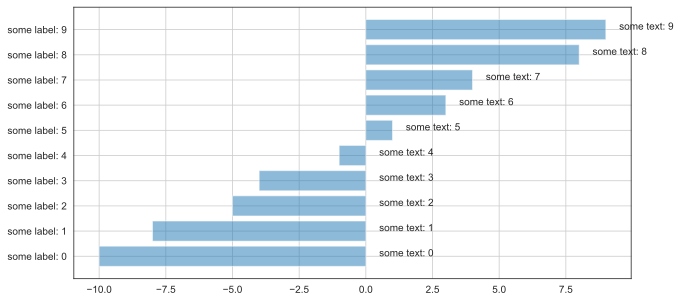

In [10]:
plt.figure(figsize=(10, 5))

plt.barh(yticks_labels, bars_length, alpha=0.5)

for i in range(len(bars_length)):
    if bars_length[i] > 0:
        plt.text((bars_length[i]) + 0.5, i, labels[i])
    else:
        plt.text(0.5, i, labels[i])

plt.grid(True)
plt.show()

Упражнение 2
Реализуйте функцию plot_time_probabilities, рисующую изменяющиеся во времени вероятности неких событий.
Cобытия для нас имеют тональность (от плохого к хорошему). Отразите ее на графике с помощью градиента по цвету.

In [11]:
import matplotlib.colors as colors
import matplotlib.cm as cm

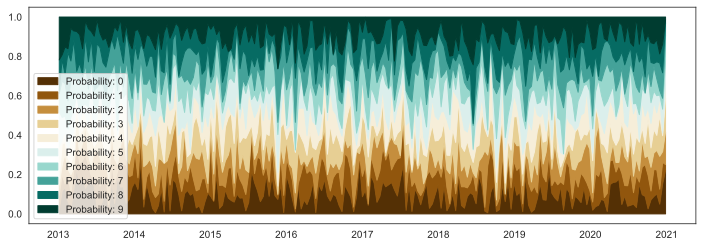

In [61]:
dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti

colors = cm.BrBG(np.linspace(0, 1, 10)) #BrBG - https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(12, 4))

current_probabilities = 0
for i, color in enumerate(colors):
    plt.fill_between(probabilities_in_time.index,
                     probabilities_in_time[i] + current_probabilities, 
                     current_probabilities,
                     color=color,
                     label='Probability: {}'.format(i))
    current_probabilities += probabilities_in_time[i]

plt.plot()
plt.legend(loc='lower left')
plt.show()

Упражнение 3
Реализуйте функцию plot_intraday_ts, рисующую тепловую карту по временному ряду с внутридневными данными

In [95]:
intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H')).to_frame()
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
df = intraday_ts

In [96]:
df['day'] = [d.date() for d in df.index]
df['time'] = [d.time() for d in df.index]
df.columns = ['Value', 'Дата', 'Время']

In [97]:
df = pd.pivot_table(df, values='Value', index='Время', columns='Дата', dropna=False)

In [98]:
df.sample(5)

Дата,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,...,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29,2020-06-30,2020-07-01
Время,,,,,,,,,,,,,,,,,,,,,
18:00:00,0.0,26.0,73.0,43.0,59.0,86.0,66.0,99.0,48.0,37.0,...,87.0,24.0,3.0,94.0,87.0,61.0,96.0,70.0,80.0,NaN
04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16:00:00,41.0,42.0,31.0,52.0,47.0,49.0,45.0,62.0,9.0,25.0,...,30.0,41.0,77.0,38.0,90.0,15.0,11.0,6.0,12.0,NaN
08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


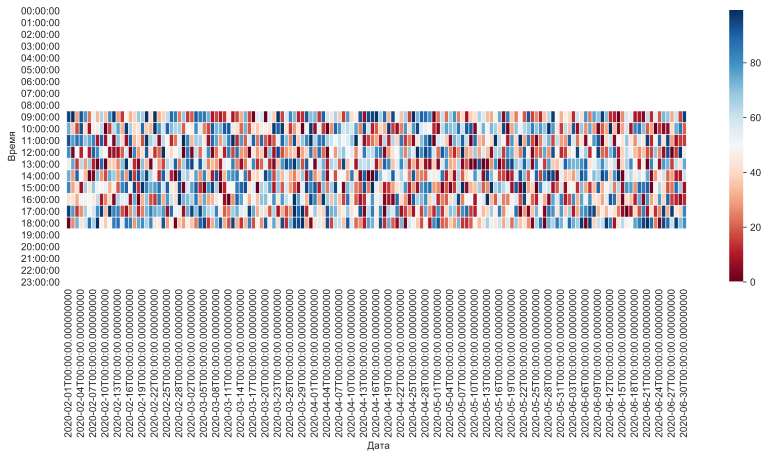

In [102]:
import seaborn as sns
plt.figure(figsize=(14, 5))
sns.heatmap(df, cmap='RdBu', linewidths=0.5, linecolor='white')